# Regression - Interpretation

## Exercise 1: Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [50]:
# exercise 1

import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression
sns.set()

tennis = pd.read_csv("../data/tennis.csv")
df = tennis.copy()
df = df[df['player1 total points won'].notnull() & df['player2 total points won'].notnull()]

In [51]:
X = df['player2 total points won']
X = sm.add_constant(X)
y = df['player1 total points won']
est = sm.OLS(y,X).fit()
summary = est.summary()

print("Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value.",
      "\n\nHere the score for the t-test is 62.836, the p value is near 0, and the coefficent is 0.8199.",
      "\nThis high t-test value represents a low error to coefficent ratio,", 
      "\nwhich makes for a more significant and less prone to error model.",
      "\nThe p-value in this regression model is near 0, which is far less than 0.05,", 
      "\nindicating a high level of statistical significance.",
      "\nThe coefficient for the relationship between the number of points won by Federer (player1, y axis)",
      "\nand the number of points won by his opponents (player2, x axis) is of 0.8199,",
      "\nindicating that on average Federer does not wins more points than his opponents, the coefficent being less than 1.")
summary

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Here the score for the t-test is 62.836, the p value is near 0, and the coefficent is 0.8199. 
This high t-test value represents a low error to coefficent ratio, 
which makes for a more significant and less prone to error model. 
The p-value in this regression model is near 0, which is far less than 0.05, 
indicating a high level of statistical significance. 
The coefficient for the relationship between the number of points won by Federer (player1, y axis) 
and the number of points won by his opponents (player2, x axis) is of 0.8199, 
indicating that on average Federer does not wins more points than his opponents, the coefficent being less than 1.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3948.
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                              11:09:28   Log-Likelihood:                -4062.7
No. Observations:                      1027   AIC:                             8129.
Df Residuals:                          1025   BIC:                             8139.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       26.2630      1.042     25.199      0.000      24.218      28.308
player2 total points won     0.8199      0.013     62.836      0.000       0.794       0.846
==============================================================================
Omnibus:                       78.409   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.799
Skew:                          -0.640   Prob(JB):                     2.89e-23
Kurtosis:                       3.888   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value? 

As for the constant term, it is not necessary because the model without the constant is a much better fit, 
the R-squared without the constant of 0.969 being much stronger than the R-squared value with the constant being 0.794. 
As we can see below, not adding a constant term increases our coefficient value from 0.8199 to 1.1242, 
giving an entirely different result that Federer wins more points than his opponents on average, the coef being higher than 1 
showing that for each value of points won by his opponents, Federer wins around 12% more points. 
The p value is still significant and under 0.05 since it is near 0, which would indicate a statistically significant model.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.196e+04
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):                        0.00
Time:                              11:13:54   Log-Likelihood:                         -4310.3
No. Observations:                      1027   AIC:                                      8623.
Df Residuals:                          1026   BIC:                                      8628.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player2 total points won     1.1242      0.006    178.783      0.000       1.112       1.137
==============================================================================
Omnibus:                       72.672   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.996
Skew:                          -0.709   Prob(JB):                     1.29e-19
Kurtosis:                       3.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

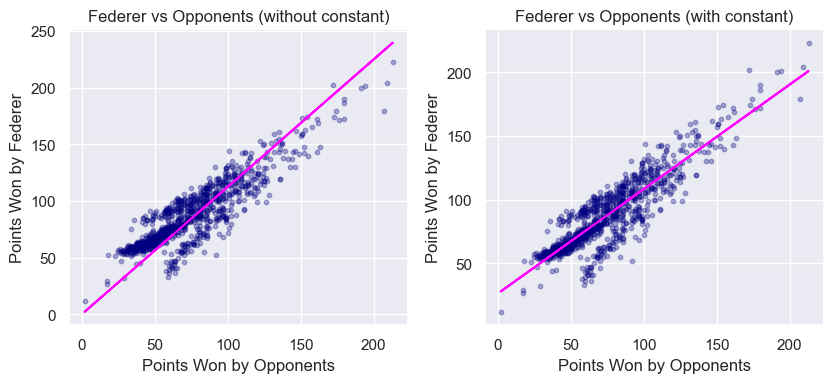

In [57]:
X1 = df['player2 total points won']
y1 = df['player1 total points won']
est1 = sm.OLS(y1,X1).fit()
summary = est1.summary()
yfit1 = est1.predict(X1)

X2 = df['player2 total points won']
X2 = sm.add_constant(X2)
X2 = np.squeeze(np.asarray(X2))
y2 = df['player1 total points won']
est2 = sm.OLS(y2,X2).fit()
yfit2 = est2.predict(X2)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8.5,4))
ax1.scatter(X1,y1,alpha=0.3,color='navy',s=10)
ax1.plot(X1,yfit1,c='magenta')
ax1.set_title('Federer vs Opponents (without constant)')
ax1.set_ylabel('Points Won by Federer')
ax1.set_xlabel('Points Won by Opponents')
ax2.scatter(X2[:,1],y2,alpha=0.3,color='navy',s=10)
ax2.plot(X2[:,1],yfit2,c='magenta')
ax2.set_title('Federer vs Opponents (with constant)')
ax2.set_ylabel('Points Won by Federer')
ax2.set_xlabel('Points Won by Opponents')
fig.tight_layout()

print("Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?",
      "\n\nAs for the constant term, it is not necessary because the model without the constant is a much better fit,",
      "\nthe R-squared without the constant of 0.969 being much stronger than the R-squared value with the constant being 0.794.",
      "\nAs we can see below, not adding a constant term increases our coefficient value from 0.8199 to 1.1242,",
      "\ngiving an entirely different result that Federer wins more points than his opponents on average, the coef being higher than 1",
      "\nshowing that for each value of points won by his opponents, Federer wins around 12% more points.",
      "\nThe p value is still significant and under 0.05 since it is near 0, which would indicate a statistically significant model.")

summary

## Exercise 2: College admissions

Using the `college.csv` dataset, answer the following:

1. Do private schools see more admissions overall? Hint: use a binary explanatory variable for `Private`

2. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

In [58]:
# exercise 2

college = pd.read_csv("../data/college.csv")
college_df = college.copy()
college_df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


1. Do private schools see more admissions overall? 

Answer: No, private schools do not see more admissions overall, since the relationship from non private schools 
admissions to private schools admissions is a negative one with a coeffient of -2613.5851, meaning that on average 
for each admission to a non private school, there are around 2614 less admissions to a private school.


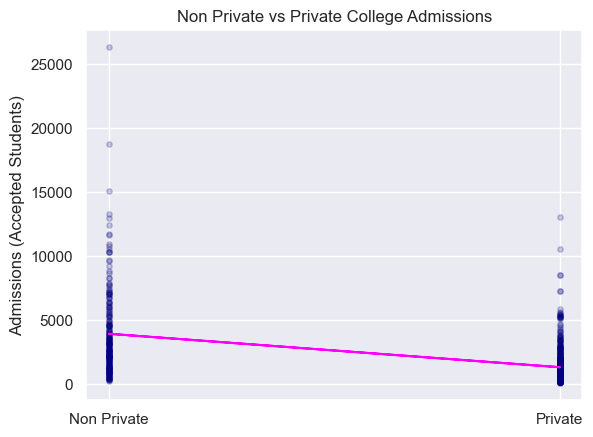

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Accept   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           4.95e-45
Time:                        11:14:16   Log-Likelihood:                -7066.5
No. Observations:                 777   AIC:                         1.414e+04
Df Residuals:                     775   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3919.2877    148.212     26.444      0.000    3628.343    4210.233
x1         -2613.5851    173.808    -15.037      0.000   -2954.776   -2272.394
==============================================================================
Omnibus:                      603.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15927.055
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      24.195   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
college_df['Private'] = college_df['Private'].apply(lambda row: int(row=="Yes"))
X = college_df['Private']
X = sm.add_constant(X)
X = np.squeeze(np.asarray(X))
y = college_df['Accept']
est = sm.OLS(y,X).fit()
summary = est.summary()
yfit = est.predict(X)

print("1. Do private schools see more admissions overall?",
      "\n\nAnswer: No, private schools do not see more admissions overall, since the relationship from non private schools",
      "\nadmissions to private schools admissions is a negative one with a coeffient of -2613.5851, meaning that on average",
      "\nfor each admission to a non private school, there are around 2614 less admissions to a private school.")

fig, ax = plt.subplots()
ax.scatter(X[:,1],y,color='navy',s=15,alpha=0.2)
ax.plot(X[:,1],yfit,c='magenta')
ax.set_xticks([0,1])
ax.set_xticklabels(['Non Private','Private'])
ax.set_title('Non Private vs Private College Admissions')
ax.set_ylabel('Admissions (Accepted Students)')
plt.show()

summary

2. Is the relation between 'Top10perc' and 'Top25perc' best fit using a model with only one variable, 
or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best  
of these model specifications? 

The best fit is the one using one variable and a polynomial of degree 2, since the regression model's R-squared is 
of 0.852 for the squared model as opposed to 0.796 for the linear model. The p-value for the squared model is also 
statistically significant, being near 0 and under 0.05. Here a constant term is useful, showing a bias towards the 
top 25% with an intercept of around 16 for the top 25%. I would select the squared model as opposed to the linear 
model because of its higher R-squared, statistically significant p-value, and lower values of both AIC and BIC.

                            OLS Regression Results                            
Dep. Variable:              Top25perc   R-squared:                       0.796
Model:               

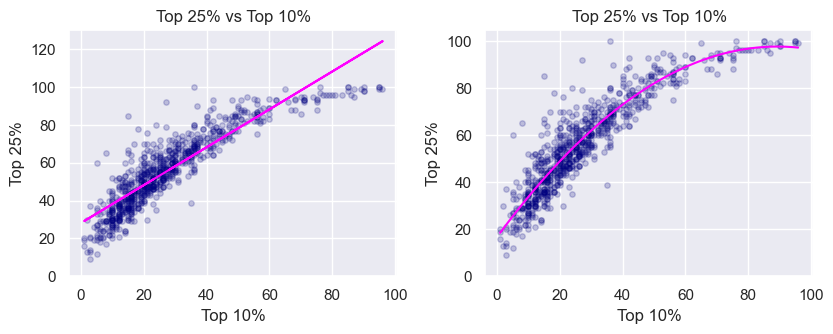

In [60]:
X1 = college_df['Top10perc']
X1 = sm.add_constant(X1)
X1 = np.squeeze(np.asarray(X1))
y1 = college_df['Top25perc']
est1 = sm.OLS(y1,X1).fit()
summary1 = est1.summary()
yfit1 = est1.predict(X1)

X2 = college_df['Top10perc']
X2 = sm.add_constant(X2)
X2 = np.squeeze(np.asarray(X2))
X2 = np.concatenate([X2, np.square(X2[:,1]).reshape(777,1)], axis=1)
y2 = college_df['Top25perc']
est2 = sm.OLS(y2,X2).fit()
summary2 = est2.summary()

X2fit = college_df['Top10perc']
X2fit = sm.add_constant(X2fit)
X2fit = np.squeeze(np.asarray(X2fit))

min_feature = X2[:,1].min()
max_feature = X2[:,1].max()
ticks = (max_feature-min_feature)/777
n=min_feature
for i in range(len(X2[:,1])):
    X2fit[i][1] = n
    n += ticks
    
X2fit = np.concatenate([X2fit, np.square(X2fit[:,1]).reshape(777,1)],axis=1)
X2fit = pd.DataFrame(X2fit)
y2fit = est2.predict(X2fit)
X2fit = np.squeeze(np.asarray(X2fit))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8.5,3.5))
ax1.scatter(X1[:,1],y1,color='navy',s=15,alpha=0.2)
ax1.plot(X1[:,1],yfit1,c='magenta')
ax1.set_title('Top 25% vs Top 10%')
ax1.set_ylabel('Top 25%')
ax1.set_xlabel('Top 10%')
ax1.set_ylim(0)
ax2.scatter(X2[:,1],y2,color='navy',s=15,alpha=0.2)
ax2.plot(X2fit[:,1],y2fit,c='magenta')
ax2.set_title('Top 25% vs Top 10%')
ax2.set_ylabel('Top 25%')
ax2.set_xlabel('Top 10%')
ax2.set_ylim(0)
fig.tight_layout()

print("2. Is the relation between 'Top10perc' and 'Top25perc' best fit using a model with only one variable,",
      "\nor one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best ",
      "\nof these model specifications?",
      "\n\nThe best fit is the one using one variable and a polynomial of degree 2, since the regression model's R-squared is",
      "\nof 0.852 for the squared model as opposed to 0.796 for the linear model. The p-value for the squared model is also",
      "\nstatistically significant, being near 0 and under 0.05. Here a constant term is useful, showing a bias towards the",
      "\ntop 25% with an intercept of around 16 for the top 25%. I would select the squared model as opposed to the linear",
      "\nmodel because of its higher R-squared, statistically significant p-value, and lower values of both AIC and BIC.\n")

print(summary1,"\n\n",summary2,"\n")

## Exercise 3: Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [61]:
# exercise 3
import re

auto = pd.read_csv("../data/auto.csv")
auto_df = auto.copy()

# Cleaning the data
auto_df.drop(0, inplace=True)
auto_df.reset_index(inplace=True)
auto_df.drop('index',axis=1,inplace=True)
columns = list(auto_df.columns)
columns = re.split(r"\t| ", columns[0])
non = ''

all_new = []
auto_df['new'] = auto_df[list(auto_df.columns)[0]].apply(lambda row: all_new.append(row))
auto_df['new'] = auto_df[list(auto_df.columns)[0]].apply(lambda row: re.split(r'\t|"',row))
auto_df['first'] = auto_df['new'].apply(lambda row: row[0])
auto_df['first'] = auto_df['first'].apply(lambda row: re.split(r'   |  ',row))
auto_df['mpg'] = auto_df['first'].apply(lambda row: row[0])
auto_df['cylinders'] = auto_df['first'].apply(lambda row: row[1])
auto_df['displacement'] = auto_df['first'].apply(lambda row: row[2])
auto_df['horsepower'] = auto_df['first'].apply(lambda row: row[4])
auto_df['weight'] = auto_df['first'].apply(lambda row: row[6])
auto_df['acceleration'] = auto_df['first'].apply(lambda row: row[8])
auto_df['year'] = auto_df['first'].apply(lambda row: row[9])
auto_df['origin'] = auto_df['first'].apply(lambda row: row[10])
auto_df['name'] = auto_df['new'].apply(lambda row: row[2])

auto_df.drop(['mpg\tcylinders\tdisplacement\thorsepower weight\tacceleration\tyear\torigin\tname',
       'new', 'first'],axis=1,inplace=True)
auto_df = auto_df[auto_df['horsepower']!='?']
auto_df['mpg'] = auto_df['mpg'].astype(float)
auto_df['horsepower'] = auto_df['horsepower'].astype(float)
auto_df['cylinders'] = auto_df['cylinders'].astype(float)
auto_df['displacement'] = auto_df['displacement'].astype(float)
auto_df['weight'] = auto_df['weight'].astype(float)
auto_df['acceleration'] = auto_df['acceleration'].astype(float)
auto_df['year'] = auto_df['year'].astype(float)
auto_df['origin'] = auto_df['origin'].astype(float)

auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
393,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
394,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
395,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


i. Is there a relationship between the predictor and the response? 

Yes, there is a relationship between the predictor (horsepower) and the response (mpg), 
The coefficient of this regression model being equal to -0.1578 and its R-squared of 0.606 being 
moderately strong.


ii. How strong is the relationship between the predictor and the response? 

There is a moderately strong relationship between the y variable and the x variable, 
the coefficient being -0.1578, meaning that for each increase in x variable, the y variable decreases by around 15%.


iii. Is the relationship between the predictor and the response positive or negative? 

The relationship between the predictor and the response is a negative one, because the 
coefficient to this model (coef for x1) is negative, or of -0.1578.


iv. What is the predicted mpg associated with a horsepower of 98?  
What are the associated 95 % confidence and prediction intervals ? 

The predicted mpg associated with a horsepower of 98 is of

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           7.03e-81
Time:                        11:15:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
x1            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

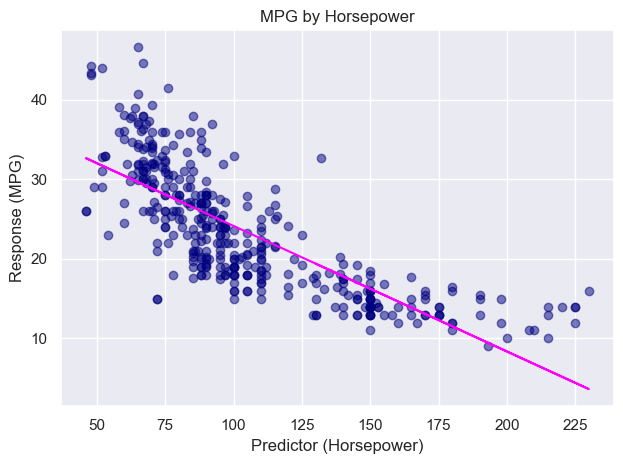

In [63]:
X = auto_df['horsepower']
X = sm.add_constant(X)
X = np.squeeze(np.asarray(X))
y = auto_df['mpg']
est = sm.OLS(y,X).fit()
summary = est.summary()
yfit = est.predict(X)
fig, ax = plt.subplots()
ax.scatter(X[:,1],y,color='navy',alpha=0.5)
ax.plot(X[:,1],yfit,c='magenta')
ax.set_title('MPG by Horsepower')
ax.set_ylabel('Response (MPG)')
ax.set_xlabel('Predictor (Horsepower)')
fig.tight_layout()

conf = est.conf_int(alpha=0.05)
predicted_value = est.predict([[1,98]])

print("i. Is there a relationship between the predictor and the response?",
      "\n\nYes, there is a relationship between the predictor (horsepower) and the response (mpg),",
      "\nThe coefficient of this regression model being equal to -0.1578 and its R-squared of 0.606 being",
      "\nmoderately strong.\n\n")
print("ii. How strong is the relationship between the predictor and the response?",
      "\n\nThere is a moderately strong relationship between the y variable and the x variable,",
      "\nthe coefficient being -0.1578, meaning that for each increase in x variable, the y variable decreases by around 15%.\n\n")
print("iii. Is the relationship between the predictor and the response positive or negative?",
      "\n\nThe relationship between the predictor and the response is a negative one, because the",
      "\ncoefficient to this model (coef for x1) is negative, or of -0.1578.\n\n")
print("iv. What is the predicted mpg associated with a horsepower of 98? ",
      "\nWhat are the associated 95 % confidence and prediction intervals ?",
      f"\n\nThe predicted mpg associated with a horsepower of 98 is of {round(predicted_value[0],1)}.",
      "\nThe associated 95% confidence and prediction intervals are between around 38.5 and 41.3 for the constant (or intercept),",
      "\nand between around -0.171 and -0.145 for the coefficient value.\n\n",conf)

summary

## Exercise 4: Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

i. Is there a relationship between the predictors and the response? 

There is a relationship between the predictors and the response, the R-squared of the model being 0.821, 
which is a strong relationship and the coefficients being different than 0.


ii. Which predictors appear to have a statistically significant relationship to the response?
 
The predictors that have a statistically significant relationship to the response, or a p-value of less than 0.05 
are displacement, weight, year, and origin.


iii. What does the coefficient for the year variable suggest?
 
The coefficent for the year variable, being 0.7508, suggests that for every increase in the year value, 
the value of MPG increases by 0.7508.


iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?
 
The problem with the fit is that the variance within the samples is quite high with an error interval of + or - 
15 MPG values in each sample for the year values and la

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          2.04e-139
Time:                        15:37:43   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

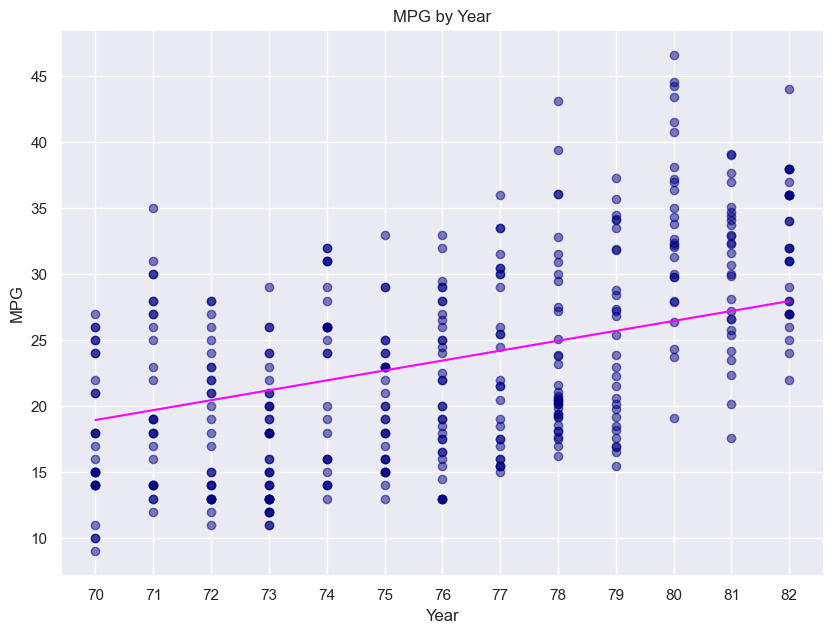

In [86]:
# exercise 4

X = auto_df.drop(columns=['name','mpg'])
X = sm.add_constant(X)
y = auto_df['mpg']
est = sm.OLS(y,X).fit()
summary = est.summary()


# For the MPG by Year plot
cylinders_m = auto_df['cylinders'].mean()
displacement_m = auto_df['displacement'].mean()
horsepower_m = auto_df['horsepower'].mean()
weight_m = auto_df['weight'].mean()
acceleration_m = auto_df['acceleration'].mean()
year_m = auto_df['year'].mean()
origin_m = auto_df['origin'].mean()

features = list(auto_df.drop(columns=['name','mpg']).columns)
means_list = []
input_df = {'const':1.0}
for i in range(len(features)):
    means_list.append(auto_df[features[i]].mean())
for j in range(len(features)):
    input_df[features[j]]=means_list[j]
input_df = pd.DataFrame(input_df,index = range(1000))

min_feature = auto_df['year'].min()
max_feature = auto_df['year'].max()
ticks = (max_feature-min_feature)/1000
n=min_feature
for i in range(len(input_df['year'])):
    input_df['year'].iloc[i] = n
    n += ticks
        
Xfit = input_df
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))

fig, ax = plt.subplots(figsize=(8.5,6.5))
ax.scatter(X[:,6],y,color='navy',alpha=0.5)
ax.plot(Xfit[:,6],yfit,c='magenta')
ax.set_title('MPG by Year')
ax.set_xlabel('Year')
ax.set_ylabel('MPG')
ax.set_xticks(list(range(70,83)))
fig.tight_layout()


print("i. Is there a relationship between the predictors and the response?",
      "\n\nThere is a relationship between the predictors and the response, the R-squared of the model being 0.821,",
      "\nwhich is a strong relationship and the coefficients being different than 0.\n\n")
print("ii. Which predictors appear to have a statistically significant relationship to the response?\n",
      "\nThe predictors that have a statistically significant relationship to the response, or a p-value of less than 0.05",
      "\nare displacement, weight, year, and origin.\n\n")
print("iii. What does the coefficient for the year variable suggest?\n",
      "\nThe coefficent for the year variable, being 0.7508, suggests that for every increase in the year value,",
      "\nthe value of MPG increases by 0.7508.\n\n")
print("iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?\n",
      "\nThe problem with the fit is that the variance within the samples is quite high with an error interval of + or -",
      "\n15 MPG values in each sample for the year values and large outliers towards the higher end of the year values.\n\n")
print("v. Is there heteroscedasticity in the fit?",
      "\n\nThere is a slight heteroscedasticity in the fit, with the variance increasing towards the end of the year values.")

summary

## Exercise 5: Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [65]:
# exercise 5

carseats = pd.read_csv("../data/carseats.csv")
carseats_df = carseats.copy()
carseats_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [66]:
X = carseats_df[['Price','Urban','US']]
X = sm.add_constant(X)
X['Urban'] = X['Urban'].apply(lambda row: int(row=='Yes'))
X['US'] = X['US'].apply(lambda row: int(row=='Yes'))
X['Price'] = X['Price'].astype(float)
X['Urban'] = X['Urban'].astype(float)
X['US'] = X['US'].astype(float)

y = carseats_df['Sales']
est = sm.OLS(y,X).fit()
summary = est.summary()
results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]    
sum_error1 = []
results_df.apply(lambda row: sum_error1.append(row['std err']), axis=1)

print("2. Provide an interpretation of each coefficient in the model. Be careful— some of the variables in the model are qualitative!",
      "\n\nThe coeffient for the price feature is of -0.0545, meaning that for each increase in value of the price,",
      "\nthe value of sales decreases by around 5%. The coefficent for Urban is -0.0219 which indicates a lower amount of",
      "\nsales for urban values as opposed to non urban values. As for the US feature, its coefficent has a value of 1.2",
      "\nshowing an higher amount of sales for US values as opposed to non US values.\n\n")
print("3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?\n",
      "\nI can reject the null hypothesis for the predictors price and US, since their p-values are of less than 0.05.")

summary

2. Provide an interpretation of each coefficient in the model. Be careful— some of the variables in the model are qualitative! 

The coeffient for the price feature is of -0.0545, meaning that for each increase in value of the price, 
the value of sales decreases by around 5%. The coefficent for Urban is -0.0219 which indicates a lower amount of 
sales for urban values as opposed to non urban values. As for the US feature, its coefficent has a value of 1.2 
showing an higher amount of sales for US values as opposed to non US values.


3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?
 
I can reject the null hypothesis for the predictors price and US, since their p-values are of less than 0.05.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.39e-23
Time:                        11:16:05   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X = carseats_df[['Price','US']]
X = sm.add_constant(X)
X['US'] = X['US'].apply(lambda row: int(row=='Yes'))
X['Price'] = X['Price'].astype(float)
X['US'] = X['US'].astype(float)
y = carseats_df['Sales']
est = sm.OLS(y,X).fit()
summary = est.summary()

results = summary.tables[1].as_html()
results_df = pd.read_html(results, header=0, index_col=0)[0]    
sum_error2 = []
results_df.apply(lambda row: sum_error2.append(row['std err']), axis=1)
conf = est.conf_int(alpha=0.05)

print("5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.",
      "\n\nThe model in 1 (with the predictors price, urban and US) and the model in 4 (with only price and US) have an R-square of 0.239, ",
      "\nwhich shows that they are both not very fitting regression models the R-square value being quite low.",
      f"\nHowever, the difference between the model 4 compared to the model 1 is that the sum of errors for this model is of {round(sum(sum_error2),3)}",
      f"\nas opposed to {round(sum(sum_error1),3)} from the first model, showing that the model 4 is more accurate and less prone to error.\n\n")
print("6. Using the model from 4, obtain 95 % confidence intervals for the coefficient(s).\n",
      "\nThe true value for the constant lies between 11.79 and 14.27 at 95% confidence, the value of the coefficient of the",
      "\nprice predictor lies between around -0.0648 and -0.0442, and the value for the coefficient of the US predictor lies",
      "\nbetween around 0.691 and 1.708.\n\n",conf)

summary

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference. 

The model in 1 (with the predictors price, urban and US) and the model in 4 (with only price and US) have an R-square of 0.239,  
which shows that they are both not very fitting regression models the R-square value being quite low. 
However, the difference between the model 4 compared to the model 1 is that the sum of errors for this model is of 0.894 
as opposed to 1.187 from the first model, showing that the model 4 is more accurate and less prone to error.


6. Using the model from 4, obtain 95 % confidence intervals for the coefficient(s).
 
The true value for the constant lies between 11.79 and 14.27 at 95% confidence, the value of the coefficient of the 
price predictor lies between around -0.0648 and -0.0442, and the value for the coefficient of the US predictor lies 
between around 0.691 and 1.708.

               0          1
const  11.79032  14.271265
Price  -0.06476  -0.044195


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.66e-24
Time:                        11:27:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""